<a href="https://colab.research.google.com/github/Harmokay/my-python-learning-journey/blob/main/NLP%20Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tasks

## Task 6.1: Download the 'Tweets' dataset from Canvas. Classify the sentiments in the dataset using six classifiers and calculate all evaluation metrics.
## NOTE: If the running time is too long, you can reduce the number of samples.
## NOTE: You should comment on your code and explain what each part is doing

In [1]:
############# WRITE THE CODE IN THIS CELL ####################
import pandas as pd
pd.set_option('display.max_column', None)
text =['This is the NLP LECTURE written by Kayode Amoran** ',' IN this lecture I"ll be explaining various DATA-CLEANING techniques',
       'So stay tuned for FURther More &&' , 'Nah I don"t think he goes to usf, he lives around']
df = pd.DataFrame({'text':text})

In [2]:
df

,text
0,This is the NLP LECTURE written by Kayode Amor...
1,"IN this lecture I""ll be explaining various DA..."
2,So stay tuned for FURther More &&
3,"Nah I don""t think he goes to usf, he lives around"


In [3]:
df['lower'] = df['text'].apply(lambda x: " ".join(x.lower()  for x in x.split()))

In [4]:
df

,text,lower
0,This is the NLP LECTURE written by Kayode Amor...,this is the nlp lecture written by kayode amor...
1,"IN this lecture I""ll be explaining various DA...","in this lecture i""ll be explaining various dat..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around"


In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
# Rmoving punctuation using string module
df.text.apply(lambda x:''.join(i for i in x if i not in string.punctuation))

,text
0,This is the NLP LECTURE written by Kayode Amoran
1,IN this lecture Ill be explaining various DAT...
2,So stay tuned for FURther More
3,Nah I dont think he goes to usf he lives around


In [7]:
df

,text,lower
0,This is the NLP LECTURE written by Kayode Amor...,this is the nlp lecture written by kayode amor...
1,"IN this lecture I""ll be explaining various DA...","in this lecture i""ll be explaining various dat..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around"


In [8]:
# Removing punctuation using regular expression
import re
df.lower.apply(lambda x:''.join(re.findall(r'[a-zA-Z+" "]',x)))

,lower
0,this is the nlp lecture written by kayode amoran
1,"in this lecture i""ll be explaining various dat..."
2,so stay tuned for further more
3,"nah i don""t think he goes to usf he lives around"


In [9]:
#Removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
df.lower.apply(lambda x:" ".join(i for i in x.split() if i not in allstopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,lower
0,nlp lecture written kayode amoran**
1,"lecture i""ll explaining various data-cleaning ..."
2,stay tuned &&
3,"nah don""t think goes usf, lives around"


In [10]:
#Spelling correction
from textblob import TextBlob
df.lower.apply(lambda x: str(TextBlob(x).correct()))

,lower
0,this is the nap lecture written by abode moran**
1,"in this lecture i""ll be explaining various dat..."
2,so stay tuned for further more &&
3,"ah i don""t think he goes to us, he lives around"


In [11]:
#Tokenisation
import nltk
nltk.download('punkt_tab')
#nltk.download('punkt)
nltk.download('wordnet')
nltk.download('omw-1.4')
mystring = "My favorite animal is dog"
nltk.word_tokenize(mystring)
mystring.split(" ")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['My', 'favorite', 'animal', 'is', 'dog']

In [12]:
import nltk
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['text'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

,text
0,thi is the nlp lectur written by kayod amoran**
1,"in thi lectur i""ll be explain variou data-clea..."
2,so stay tune for further more &&
3,"nah i don""t think he goe to usf, he live around"


In [13]:
df

,text,lower
0,This is the NLP LECTURE written by Kayode Amor...,this is the nlp lecture written by kayode amor...
1,"IN this lecture I""ll be explaining various DA...","in this lecture i""ll be explaining various dat..."
2,So stay tuned for FURther More &&,so stay tuned for further more &&
3,"Nah I don""t think he goes to usf, he lives around","nah i don""t think he goes to usf, he lives around"


In [14]:
"lemmatisation"
import textblob
from textblob import Word
df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

,text
0,This is the NLP LECTURE written by Kayode Amor...
1,"IN this lecture I""ll be explaining various DAT..."
2,So stay tuned for FURther More &&
3,"Nah I don""t think he go to usf, he life around"


In [15]:
# frequency
all_words = []
for sentence in df['text']:
    all_words.extend(sentence.split())
import nltk
nltk.FreqDist(all_words)

FreqDist({'he': 2, 'This': 1, 'is': 1, 'the': 1, 'NLP': 1, 'LECTURE': 1, 'written': 1, 'by': 1, 'Kayode': 1, 'Amoran**': 1, ...})

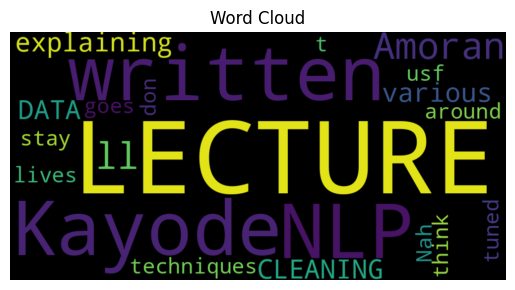

In [17]:
# word cloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
words = []
for message in df['text']:
    words.extend([word for word in message.split() if word not in STOPWORDS])

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()

In [18]:
from textblob import TextBlob

text_1 = "The movie was so awesome."
text_2 = "The food here tastes terrible."

#Determining the Polarity
p_1 = TextBlob(text_1).sentiment.polarity
p_2 = TextBlob(text_2).sentiment.polarity

#Determining the Subjectivity
s_1 = TextBlob(text_1).sentiment.subjectivity
s_2 = TextBlob(text_2).sentiment.subjectivity

print("Polarity of Text 1 is", p_1)
print("Polarity of Text 2 is", p_2)
print("Subjectivity of Text 1 is", s_1)
print("Subjectivity of Text 2 is", s_2)

Polarity of Text 1 is 1.0
Polarity of Text 2 is -1.0
Subjectivity of Text 1 is 1.0
Subjectivity of Text 2 is 1.0


In [19]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
text_1 = "The book was a perfect balance between wrtiting style and plot."
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
print("Sentiment of text 1:", sent_1)
print("Sentiment of text 2:", sent_2)

Sentiment of text 1: {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}
Sentiment of text 2: {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}


############ WRITE YOUR REPORT IN THIS CELL (IF APPLICABLE) #############




